In [1]:
import pandas as pd
import os 
import numpy as np

import matplotlib.pyplot as plt

%matplotlib widget

In [2]:
csv_path = "/mnt/c/Users/J-Dau/OneDrive/TUM/04_SS23/02_MA/03_CSVs"

In [3]:
li = []
for file in os.listdir(csv_path):
    fpath = os.path.join(csv_path, file)
    if os.path.exists(fpath) and os.path.isfile(fpath):
        df = pd.read_csv(fpath)
        li.append(df)
      
df = pd.concat(li, axis=0, ignore_index=True)

In [4]:
def extract(df, topic):
    new_df = df.loc[df['topic'] == topic]
    arr = new_df[["receive time", "value"]].to_numpy()
    arr[:,0] -= arr[0,0]
    return arr

In [5]:
hor_vel = extract(df, "/edgar/sensor/gps/novatel/bestvel.hor_speed")
trk_gnd = extract(df, "/edgar/sensor/gps/novatel/bestvel.trk_gnd")
dualantenna = extract(df, "/edgar/sensor/gps/novatel/dualantennaheading.heading")
gps_track = extract(df, "/edgar/sensor/gps/novatel/gps.track")
heading2 = extract(df, "/edgar/sensor/gps/novatel/heading2.heading")


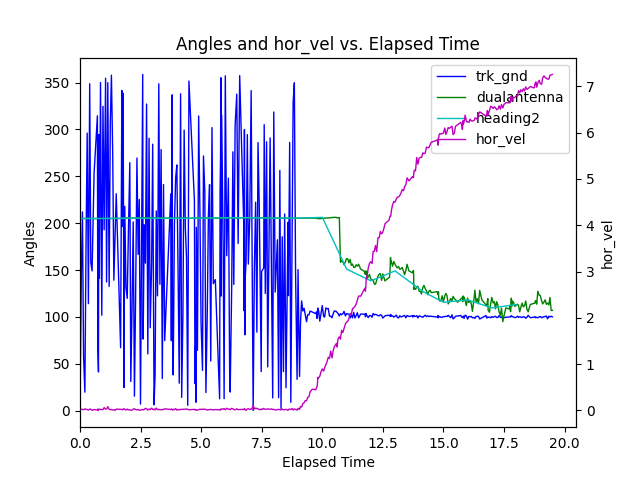

In [16]:
fig, ax1 = plt.subplots()

# Plot the four angles on the left y-axis
ax1.plot(trk_gnd[:,0], trk_gnd[:,1], label='trk_gnd', color='b', linewidth=1.0)
ax1.plot(dualantenna[:,0], dualantenna[:,1], label='dualantenna', color='g', linewidth=1.0)
# ax1.plot(gps_track[:,0], gps_track[:,1], label='gps_track', color='r')
ax1.plot(heading2[:,0], heading2[:,1], label='heading2', color='c',linewidth=1.0)

# Set labels and title for the left y-axis
ax1.set_xlabel('Elapsed Time')
ax1.set_ylabel('Angles', color='black')
ax1.tick_params(axis='y', labelcolor='black')


# Create a second y-axis on the right
ax2 = ax1.twinx()

# Plot hor_vel on the right y-axis
ax2.plot(hor_vel[:,0], hor_vel[:,1], label='hor_vel', color='m', linewidth=1.0)

# Set labels and title for the right y-axis
ax2.set_ylabel('hor_vel', color='black')
ax2.tick_params(axis='y', labelcolor='black')


# Combine legends into a single legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='best')

# Limit x-axis to zero
ax1.set_xlim(left=0)



# Show the plot
# plt.grid(True)
plt.title('Angles and hor_vel vs. Elapsed Time')
plt.show()
plt.savefig("myimage.pdf", dpi=1200)

In [ ]:
df